# Peer in THRG Generated Graphs

## Dev Space
System: sailntrpy
Dir: `~/Research/Phoenix/PhoenixPython`

## Toy Graph - The Example Graph
This graph is shown as the example graph in the PAMI paper.

In [1]:
# imports
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
params = {'legend.fontsize':'small',
          'figure.figsize': (7,7),
          'axes.labelsize': 'small',
          'axes.titlesize': 'small',
          'xtick.labelsize':'small',
          'ytick.labelsize':'small'}
plt.rcParams.update(params)
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

In [2]:
def unique_node_aggregation_perts(gb,pddf):
#     print(r'* Unique edges added at each time stamp')
    acnd= []
    uniq_v= {}
    for k,v in gb.groups.items():
        nodes = pddf[['u','v']].loc[v].values[0]
        newvcnt=0
        for x in nodes:
            if not(x in acnd):
                [acnd.append(x) for x in nodes if not(x in acnd)] 
                newvcnt +=1
        uniq_v[k] = newvcnt
    df = pd.DataFrame.from_dict(uniq_v.items())
    df.sort_values(by=[0],inplace=True)
    return df

In [3]:
G = nx.Graph()
G.add_edge(0, 1,attr_dict={'ts':1})
G.add_edge(0, 4,attr_dict={'ts':38})
G.add_edge(0, 6,attr_dict={'ts':32})
G.add_edge(1, 2,attr_dict={'ts':2})
G.add_edge(1, 3,attr_dict={'ts':12})
G.add_edge(2, 3,attr_dict={'ts':14})
G.add_edge(2, 5,attr_dict={'ts':27})
G.add_edge(3, 4,attr_dict={'ts':11})
G.add_edge(3, 5,attr_dict={'ts':24})
G.add_edge(4, 6,attr_dict={'ts':40})




### Network Dynamics
Let's examine the network dynamics


* Unique edges added at each time stamp


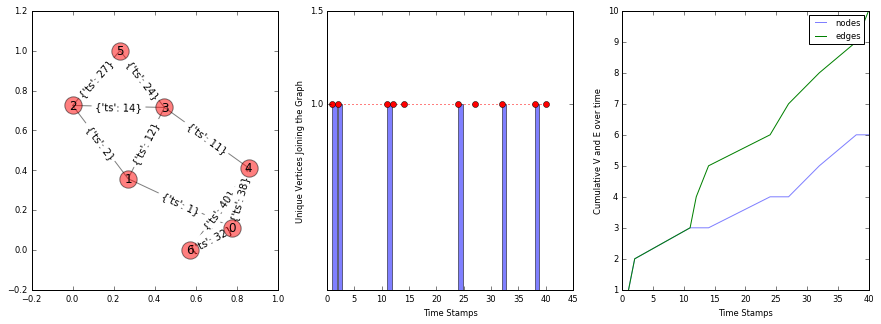

In [4]:
t  = [d.values()[0] for u,v,d  in G.edges(data=True)]
g_edges = [[d.values()[0],u,v] for u,v,d  in G.edges(data=True)]
df = pd.DataFrame(g_edges, columns=['ts','u','v']) # u= source, v= target
gb = df.groupby(['ts'])

print(r'* Unique edges added at each time stamp')
acnd= []
uniq_v= {}
for k,v in gb.groups.items():
    nodes = df[['u','v']].loc[v].values[0]
    newvcnt=0
    for x in nodes:
        if not(x in acnd):
            [acnd.append(x) for x in nodes if not(x in acnd)] 
            newvcnt +=1
    uniq_v[k] = newvcnt
df = pd.DataFrame.from_dict(uniq_v.items())
df.sort_values(by=[0],inplace=True)


f, axs = plt.subplots(1, 3, figsize=(15,5))
ax0=axs[0]
ax1=axs[1]
ax2=axs[2]

pstn = nx.spring_layout(G)
nx.draw_networkx(G,pos=pstn, alpha=0.5,ax=ax0)
nx.draw_networkx_edge_labels(G,pos=pstn,alpha=0.5,ax=ax0)

nf = gb['v'].count()
df['ecnt'] = gb['v'].count().values
df['cs']= df[1].cumsum()
df['ce']= df['ecnt'].cumsum()



ax1.plot(df[0].values,df['ecnt'].values,'ro',linestyle=':')
ax1.bar(df[0].values,df[1].values, width = 0.8, alpha=0.5)
ax1.set_ylim([0,1.5]);
ax1.set_xlabel('Time Stamps')
ax1.set_ylabel('Unique Vertices Joining the Graph')
ax1.set_yticks([1,1.5]);


# Cummulative nodes
ax2.plot(df[0].values,df['cs'].values, alpha=0.5, label='nodes')
ax2.plot(df[0].values,df['ce'].values,label='edges')
ax2.legend()

ax2.set_xlabel('Time Stamps');
ax2.set_ylabel('Cumulative V and E over time');



In [5]:
# nx.nx.write_edgelist(G, '/tmp/out.weighted_example_graph',data=True)

## THRG 
Using `time1.py` we learn or derive the production rules from the given 
graph. Then, using `time2.py` we generate graphs given the THRG graph 
model.

### Toy Example

The board example is a toy graph. The following is inspired in part by this [webpost](http://notebook.madsenlab.org/project:coarse%20grained%20model/model:seriationct/experiment:experiment-seriationct/2014/07/28/implementing-temporal-networks-in-python.html).

In [6]:
%run time/time1.py -d /tmp/toygraph -b 4 -i 0 -g ''Toygraph''

['time/time1.py', '-d', '/tmp/toygraph', '-b', '4', '-i', '0', '-g', 'Toygraph']
Bucket:Edge Count
	0: 2
	1: 3
	2: 2
	3: 3
Ignoring buckets: []
Source Graph nodes, edges: 7, 10
After ignore: 7, 10


In [7]:
%run time/time2.py -din /tmp/toygraph -dout /tmp/toygraph_o -m 2 -gen 20

Nodes Edges Cliques Computed
7     11    9               
8     12    10              
5     9     7               
6     10    8               
5     9     7               
7     11    9               
7     11    9               
6     10    8               
6     10    8               
8     12    10              
6     10    8               
8     12    10              
6     10    8               
6     10    8               
6     10    8               
8     12    10              
5     9     7               
6     10    8               
7     11    9               
6     10    8               


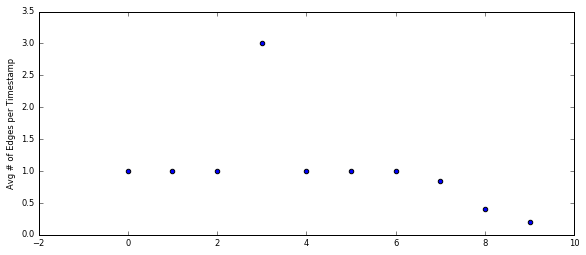

In [8]:
from glob import glob 
dir_path = "/tmp/toygraph_o"
c_files = glob(dir_path+ "/*cliques.p")

e_files = glob(dir_path+ "/*edges.p")
if 0:
    for j,f in enumerate(c_files):
        clq_lst = pickle.load(open(f, "rb"))
        print j, len(clq_lst), clq_lst
        for c in clq_lst:
            print c.history, c.nids
        break
gdf = pd.DataFrame()    
for f in e_files:
    edg_lst = pickle.load(open(f, "rb"))
    df  = pd.DataFrame(edg_lst)
    gdf = gdf.append(df)
    
# print gdf.shape
gb =  gdf.groupby([2]).count()/20.0
# print gb.head()
f, axs = plt.subplots(1, 1, figsize=(1.6 * 6., 1 * 4.))
axs.scatter(x=gb.index.values,y=gb[1])
axs.set_ylabel('Avg # of Edges per Timestamp');
# plt.boxplot(gb[1].values, labels=)
# print gb.index.values
# print gb[1].values

Average Node Degree for the group of K=20 generated graphs.

In [15]:
# # Average Node Degree for the group of K=20 generated graphs
# gb = gdf.groupby([2]).groups
# avgk =[]
# for k,v in gb.items():
# #     print gdf.loc[gb.groups[k]]
#     df= gdf.loc[v]
#     df.columns = ['s','t','ts']
# #     print df.head()
#     g = nx.from_pandas_dataframe(df, 's','t', ['ts'])
# #     nodes.append(g.number_of_nodes())
#     avgk.append(g.degree().values())
# #     print k, np.mean(g.degree().keys()), g.degree().keys()

# f, axs = plt.subplots(1, 2, figsize=(1.6 * 6., 1 * 4.))
# axs[0].boxplot(avgk);
# axs[0].set_ylim([0,5])
# axs[0].set_ylabel('Degree per Timestamp');

# in blocks 
gdf.columns = ['u','v','ts']
# print gdf.head()
span  = gdf.ts.max() - gdf.ts.min()
slic = span/4.
for blk in range(int(gdf.index.min()),int(gdf.index.max()),int(slic)):
    mask = (gdf['ts'] >= blk) & (gdf['ts'] <= blk+slic)
    df = gdf.loc[mask]
    g = nx.from_pandas_dataframe(df, 'u','v',['ts'])
    print g.degree()
    print nx.average_degree_connectivity()
    break


{0: 2, 1: 1, 2: 1, 3: 1, 4: 1}
{1: 1.5, 2: 1.0}


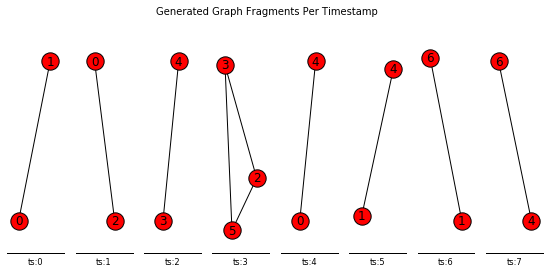

In [126]:
# Average Degree At each time stamp
# in one generated graph determine the average degree
import pprint as pp
print ()
for f in e_files:
    edg_lst = pickle.load(open(f, "rb"))
    df  = pd.DataFrame(edg_lst, columns=['u','v','ts'])
    
    # Within this set of edges, gropu by time-stamp (lowest level)
    gb = df.groupby(['ts']).groups
    kd_lst = [nx.from_pandas_dataframe(df.loc[v],'u','v',['ts']).degree() for k,v in gb.items()]
    ts_graphs = [nx.from_pandas_dataframe(df.loc[v],'u','v',['ts']) for k,v in gb.items()]
    
    grps_k = [d.keys() for d in kd_lst]
    # print  [np.mean(kg) for kg in grps_k]
    
    g = nx.from_pandas_dataframe(df.loc[v],'u','v',['ts'])
    f, axmult = plt.subplots(1, len(ts_graphs), figsize=(1.6 * 6., 1 * 4.))
    
    for j,axs in enumerate(axmult):
        nx.draw_networkx(ts_graphs[j],pos=nx.spring_layout(ts_graphs[j]),ax=axs)
        axs.set_xlabel('ts:'+str(j))
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs.spines['left'].set_visible(False)
#         axs.axis('off')
        axs.get_yaxis().set_visible(False)
        axs.get_xaxis().set_ticks([])
        if 0: print ts_graphs[j].degree().values()
    break
    
plt.suptitle('Generated Graph Fragments Per Timestamp');


Looking at the Avg Nodes and Edges in a group of generated graphs

(-1, 10)

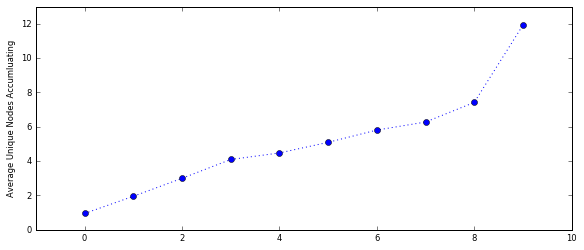

In [179]:
#
# From the group of generated graphs, these are some stats
# 
mdf = pd.DataFrame()
for f in e_files:
    edg_lst = pickle.load(open(f, "rb"))
    df  = pd.DataFrame(edg_lst)
    df.columns = ['u','v','ts']
    
    gb = df.groupby(['ts'])
#     print gb.keys()
#     nodes = []
#     for k,v in gb.items():
#         g = nx.from_pandas_dataframe(df.loc[v],'u','v',['ts'])
#         nodes.append([k,g.number_of_nodes()])
#         print g.number_of_nodes()
#     print nodes
    nf = unique_node_aggregation_perts(gb, df)
    nf.columns = ['ts','v']
    if f == e_files[0]:
        mdf = nf
        continue
    # nf['cs'] = nf[1].cumsum()
    mdf = pd.merge(left=nf,right=mdf,on='ts',how='outer')
    
    
    # df = pd.DataFrame(nodes)
mdf['avgVcnt'] = mdf.mean(axis=1)
mdf['cs'] = mdf['avgVcnt'].cumsum()
# print mdf.head()
# df['cs'] = df[0].cumsum()
# nf[[1,'cs']].plot()
f, axs = plt.subplots(1, 1, figsize=(1.6 * 6., 1 * 4.))
# axs.plot(nf[0].values, nf[1].values)
mdf['cs'].plot(x='ts',ax=axs,marker='o',linestyle=":");
axs.set_ylabel('Average Unique Nodes Accumluating')
axs.set_ylim(0,13)
axs.set_xlim(-1,10)